# Proceso de convolución en imágenes

### 1. Representación de la imagen y el filtro

- Denotemos la **imagen** como una matriz real:
  $$
  I \in \mathbb{R}^{m \times n}
  $$
  donde $m$ es el número de filas (alto) y $n$ es el número de columnas (ancho).

- Denotemos el **filtro (o kernel)** como:
  $$
  K \in \mathbb{R}^{p \times q}
  $$
  donde normalmente $p, q$ son pequeños (por ejemplo, $p=q=3$ para un filtro $3 \times 3$).

---

### 2. Definición de la operación de convolución

La **convolución discreta** entre $I$ y $K$ genera una nueva matriz $O$ (output) donde cada elemento es:
$$
O(i,j) = \sum_{u=0}^{p-1} \sum_{v=0}^{q-1} K(u,v) \cdot I(i+u, j+v)
$$
para cada posición $(i,j)$ donde la operación es válida.

**Notas**:
- Aquí no se está haciendo "flip" del kernel (lo cual técnicamente sería necesario para una convolución pura); en procesamiento de imágenes, frecuentemente se usa directamente el *cross-correlation* en lugar de la convolución matemática estricta.
- Se asume que no hay padding: el tamaño del output será $(m-p+1)\times (n-q+1)$.
- El índice $(i,j)$ recorre solo posiciones donde el filtro cabe completamente sobre la imagen.

---

### 3. Forma alternativa con notación matricial expandida

Cada valor $O(i,j)$ puede verse como el **producto interno** entre:
- el sub-bloque de la imagen $I$ de tamaño $p \times q$ comenzando en $(i,j)$,
- y el filtro \(K\).

Esto se puede expresar como:

$$
O(i,j) = \langle I_{(i:i+p-1, j:j+q-1)}, K \rangle
$$

donde $\langle \cdot, \cdot \rangle$ denota el producto interno de matrices, es decir:

$$
\langle A, B \rangle = \sum_{u,v} A(u,v) B(u,v)
$$

En palabras: **multiplica elemento a elemento y suma todo**.

---

### 4. Ejemplo numérico pequeño

Supongamos:

$$
I = \begin{bmatrix}
1 & 2 & 0 & 1\\
4 & 1 & 2 & 2\\
1 & 3 & 0 & 0\\
2 & 1 & 3 & 1
\end{bmatrix}
\quad
K = \begin{bmatrix}
1 & 0\\
0 & -1
\end{bmatrix}
$$

El primer valor del output sería:

$$
O(0,0) = 1 \cdot 1 + 2 \cdot 0 + 4 \cdot 0 + 1 \cdot (-1) = 1 + 0 + 0 - 1 = 0
$$

Se sigue avanzando desplazando el filtro sobre la imagen.

---

### 5. Resumen final

**Convolución en imágenes** usando notación matricial:

- Imagen: $I \in \mathbb{R}^{m \times n}$
- Filtro: $K \in \mathbb{R}^{p \times q}$
- Output (sin padding): $O \in \mathbb{R}^{(m-p+1) \times (n-q+1)}$
- Operación en cada punto:

$$
O(i,j) = \sum_{u=0}^{p-1} \sum_{v=0}^{q-1} K(u,v) \cdot I(i+u, j+v)
\quad \text{equivalentemente} \quad
O(i,j) = \langle I_{(i:i+p-1, j:j+q-1)}, K \rangle
$$

# Ejemplo de código

1. Cargar una imagen base

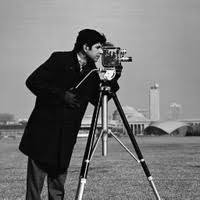

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

image = Image.open("cameraman.jpeg").convert("L")

display(image)

Convertir la imagen a un array numpy

In [2]:
image = np.array(image)
print(image)
print(image.shape)


[[156 156 157 ... 153 153 153]
 [156 156 157 ... 153 153 153]
 [156 156 157 ... 152 152 152]
 ...
 [122 127 106 ... 127 131 123]
 [132 133 130 ... 145 140 116]
 [126 127 149 ... 116 125 118]]
(200, 200)


2. Agregar ruido sal y pimienta

In [3]:
def add_salt_and_pepper_noise(image, amount=0.05, salt_vs_pepper=0.5):
    noisy_image = image.copy()
    num_pixels = int(amount * image.size)
    
    # Sal
    coords = [np.random.randint(0, i - 1, num_pixels) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255
    
    # Pimienta
    coords = [np.random.randint(0, i - 1, num_pixels) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

noisy_image = add_salt_and_pepper_noise(image)

3. Definir un filtro promedio (3x3)

In [4]:
kernel = np.ones((3,3)) / 9

4. Aplicar convolución manual

In [5]:
def convolve(image, kernel):
    m, n = image.shape
    p, q = kernel.shape
    output = np.zeros((m - p + 1, n - q + 1))
    
    for i in range(m - p + 1):
        for j in range(n - q + 1):
            region = image[i:i+p, j:j+q]
            output[i,j] = np.sum(region * kernel)
    
    return output

# Aplicar la convolución
smoothed_image = convolve(noisy_image, kernel)

5. Mostrar las imágenes

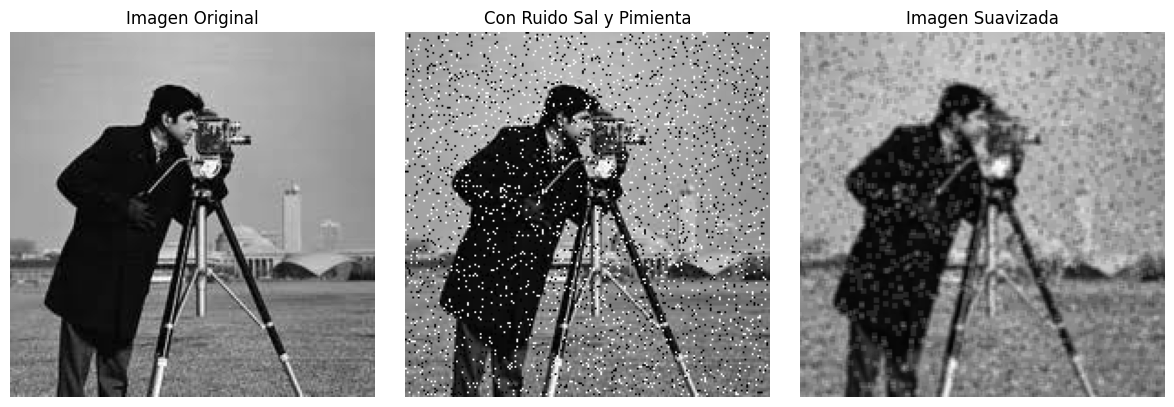

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Con Ruido Sal y Pimienta')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Imagen Suavizada')
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### Ejercicio
Revisa el enlace: https://setosa.io/ev/image-kernels/ e implementa un código que aplique los kernels que allí se muestran. Compara el tiempo de ejecución al aplicar la convolución usando una implementación con ciclos *for* versus una implementación con *cv.filter2D* de OpenCV.

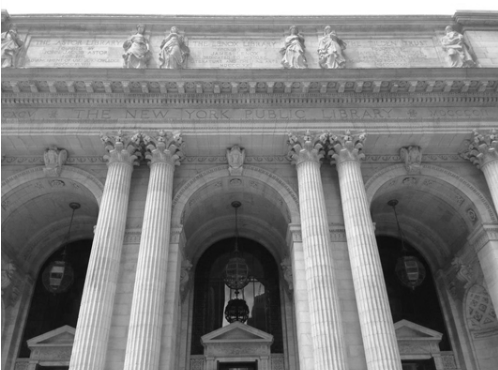

(200, 200)


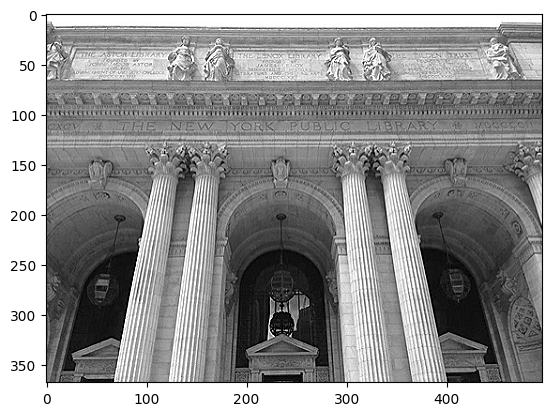

In [7]:
image_2 = Image.open("imagen.png").convert("L")
display(image_2)

image_2 = np.array(image_2)
print(image.shape)

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1], 
                           [0, -1, 0]])

sharpened_image = convolve(image_2, sharpen_kernel)

plt.imshow(sharpened_image, cmap="gray", vmin=0, vmax=255)

Ahora le aplico el kernel  blur: 

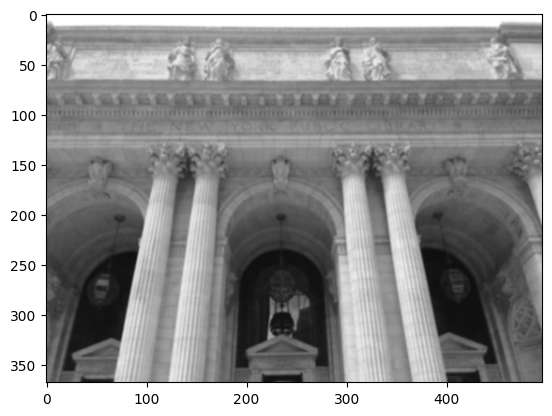

In [8]:
blur_kernel_2 = np.array([[0.0625, 0.125, 0.0625],
                           [0.125, 0.25, 0.125], 
                           [0.0625, 0.125, 0.0625]])

blured_image_2 = convolve(image_2, blur_kernel_2)

plt.imshow(blured_image_2, cmap='gray', vmin=0, vmax=255)

ahora le aplicamos el bottom sobel:

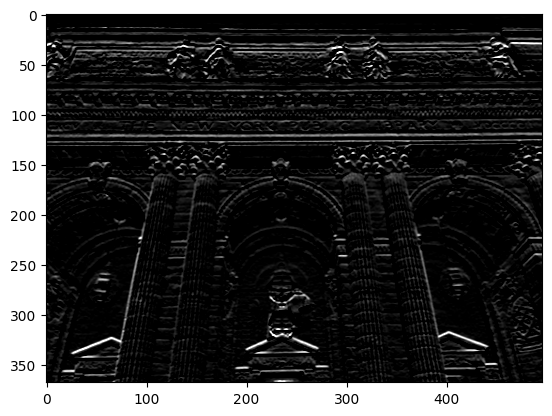

In [9]:
bottom_kernel_3 = np.array([[-1, -2, -1],
                           [0, 0, 0], 
                           [1, 2, 1]])

bottomed_image_3 = convolve(image_2, bottom_kernel_3)

plt.imshow(bottomed_image_3, cmap='gray', vmin=0, vmax=255)

Ahora el right sobel: 

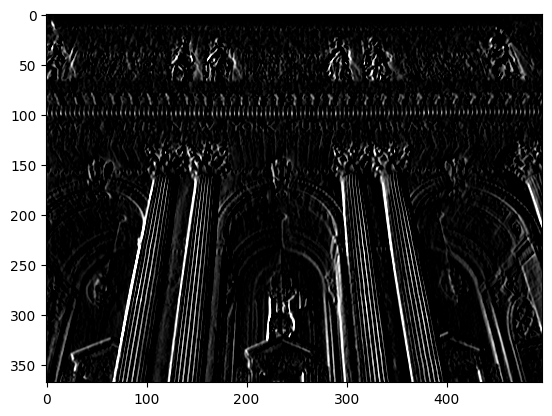

In [10]:
righ_sobel_kernel_4 = np.array([[-1, 0, 1],
                           [-2, 0, 2], 
                           [-1, 0, 1]])

righ_sobeled_image_4 = convolve(image_2, righ_sobel_kernel_4)

plt.imshow(righ_sobeled_image_4, cmap='gray', vmin=0, vmax=255)

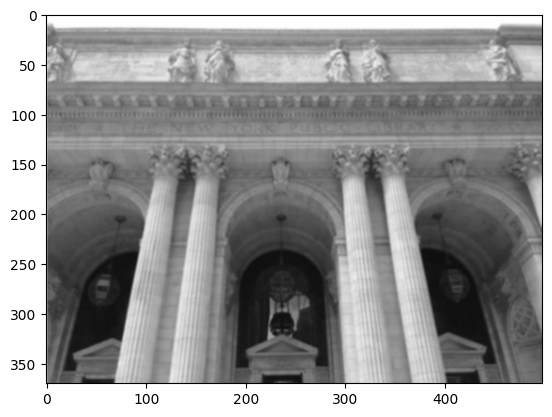

In [13]:
import cv2

image = cv2.imread('imagen.png')


sharpen_cv= cv2.filter2D(image, -1, blur_kernel_2)

plt.imshow(sharpen_cv, cmap='gray', vmin=0, vmax=255)